<a href="https://colab.research.google.com/github/muajnstu/phishing_URL_detection_using_transductive_learning-/blob/main/Transductive_learning_using_several_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score

# Create a synthetic dataset with two circles
X, y = make_circles(n_samples=100, factor=0.5, noise=0.05, random_state=42)
y[::5] = -1  # Introduce some unlabeled instances

# Split the data into labeled and unlabeled sets
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

# Create a LabelPropagation model and fit it on the labeled data
label_prop_model = LabelPropagation(kernel='knn', n_neighbors=10)
label_prop_model.fit(X_labeled, y_labeled)

# Predict labels for the unlabeled data
y_pred = label_prop_model.predict(X_unlabeled)

# Evaluate the performance on the unlabeled data
accuracy = accuracy_score(y_unlabeled, y_pred)
print(f"Accuracy on unlabeled data: {accuracy:.2f}")


Accuracy on unlabeled data: 0.48


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Load the PhiUSIIL Phishing URL Datase
url = 'https://media.githubusercontent.com/media/shahriariit/opendataset/master/PhiUSIIL_phishing.csv'
data = pd.read_csv(url)

# Preprocessing
#data['Revenue'] = data['Revenue'].astype(int)
#data['Weekend'] = data['Weekend'].astype(int)

# Simulate some unlabeled instances
num_unlabeled = 1000
unlabeled_indices = np.random.choice(len(features), num_unlabeled, replace=False)
target[unlabeled_indices] = -1  # Treat these instances as unlabeled

# Split data into labeled and unlabeled sets
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
    features, target, test_size=num_unlabeled, random_state=42, stratify=target)

# Create a LabelPropagation model and fit it on the labeled data
label_prop_model = LabelPropagation(kernel='knn', n_neighbors=10)
label_prop_model.fit(X_labeled, y_labeled)

# Predict labels for the unlabeled data
y_pred = label_prop_model.predict(X_unlabeled)

# Evaluate the performance on the unlabeled data
accuracy = accuracy_score(y_unlabeled, y_pred)
precision = precision_score(y_unlabeled, y_pred, average='weighted')
recall =recall_score(y_unlabeled, y_pred, average='weighted')
f_measure = f1_score(y_unlabeled, y_pred, average='weighted')


print(f"Accuracy on unlabeled data: {accuracy:.2f}")
print(f'Precision on unlabeled data: {precision:.4f}')
print(f'Recall on unlabeled data: {recall:.4f}')
print(f'F1_score on unlabeled data: {f_measure:.4f}')



<ipython-input-2-de56f6b5609a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target[unlabeled_indices] = -1  # Treat these instances as unlabeled


Accuracy on unlabeled data: 0.99
Precision on unlabeled data: 0.9811
Recall on unlabeled data: 0.9890
F1_score on unlabeled data: 0.9850


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-3-016e364232c0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['label'], palette='Blues')


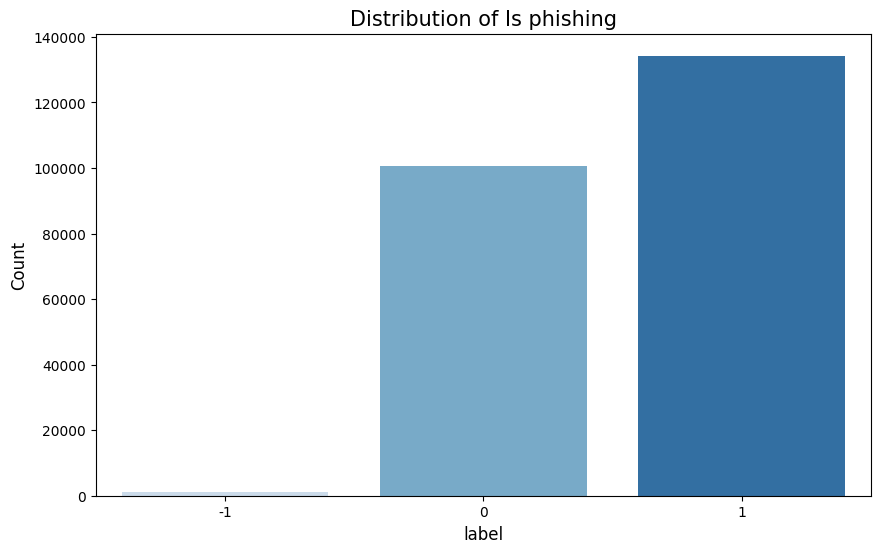

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x=data['label'], palette='Blues')
plt.title('Distribution of Is phishing', fontsize=15)
plt.xlabel('label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load the PhiUSIIL Phishing URL Datase
url = 'https://media.githubusercontent.com/media/shahriariit/opendataset/master/PhiUSIIL_phishing.csv'
data = pd.read_csv(url)

# Preprocessing
#data['Revenue'] = data['Revenue'].astype(int)
#data['Weekend'] = data['Weekend'].astype(int)

# Select relevant features and target
features = data.drop(['label'], axis=1)
target = data['label']

# Simulate some unlabeled instances
num_unlabeled = 1000
unlabeled_indices = np.random.choice(len(features), num_unlabeled, replace=False)
target[unlabeled_indices] = -1  # Treat these instances as unlabeled

# Split data into labeled and unlabeled sets
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
    features, target, test_size=num_unlabeled, random_state=42, stratify=target)

# Create and train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_labeled, y_labeled)

# Predict labels for the unlabeled data
y_pred = random_forest_classifier.predict(X_unlabeled)

# Evaluate the performance on the unlabeled data
accuracy = accuracy_score(y_unlabeled, y_pred)
precision = precision_score(y_unlabeled, y_pred, average='weighted')
recall =recall_score(y_unlabeled, y_pred, average='weighted')
f_measure = f1_score(y_unlabeled, y_pred, average='weighted')


print(f"Accuracy on unlabeled data: {accuracy:.2f}")
print(f'Precision on unlabeled data: {precision:.4f}')
print(f'Recall on unlabeled data: {recall:.4f}')
print(f'F1_score on unlabeled data: {f_measure:.4f}')


<ipython-input-6-5adb11f6eb21>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target[unlabeled_indices] = -1  # Treat these instances as unlabeled


Accuracy on unlabeled data: 1.00
Precision on unlabeled data: 0.9920
Recall on unlabeled data: 0.9960
F1_score on unlabeled data: 0.9940


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load the PhiUSIIL Phishing URL Datase
url = 'https://media.githubusercontent.com/media/shahriariit/opendataset/master/PhiUSIIL_phishing.csv'
data = pd.read_csv(url)


# Select relevant features and target
features = data.drop(['label'], axis=1)
target = data['label']

# Simulate some unlabeled instances
num_unlabeled = 1000
unlabeled_indices = np.random.choice(len(features), num_unlabeled, replace=False)
target[unlabeled_indices] = -1  # Treat these instances as unlabeled

# Split data into labeled and unlabeled sets
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
    features, target, test_size=num_unlabeled, random_state=42, stratify=target)

# Create a base classifier
base_classifier = DecisionTreeClassifier(random_state=42)

# Create and train a Bagging classifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=50, random_state=42)
bagging_classifier.fit(X_labeled, y_labeled)

# Predict labels for the unlabeled data
y_pred = bagging_classifier.predict(X_unlabeled)

# Evaluate the performance on the unlabeled data
accuracy = accuracy_score(y_unlabeled, y_pred)
precision = precision_score(y_unlabeled, y_pred, average='weighted')
recall =recall_score(y_unlabeled, y_pred, average='weighted')
f_measure = f1_score(y_unlabeled, y_pred, average='weighted')


print(f"Accuracy on unlabeled data: {accuracy:.2f}")
print(f'Precision on unlabeled data: {precision:.4f}')
print(f'Recall on unlabeled data: {recall:.4f}')
print(f'F1_score on unlabeled data: {f_measure:.4f}')


<ipython-input-2-7bebde1a9c6e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target[unlabeled_indices] = -1  # Treat these instances as unlabeled


Accuracy on unlabeled data: 1.00
Precision on unlabeled data: 0.9920
Recall on unlabeled data: 0.9960
F1_score on unlabeled data: 0.9940


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load the PhiUSIIL Phishing URL Datase
url = 'https://media.githubusercontent.com/media/shahriariit/opendataset/master/PhiUSIIL_phishing.csv'
data = pd.read_csv(url)

# Preprocessing
#data['Revenue'] = data['Revenue'].astype(int)
#data['Weekend'] = data['Weekend'].astype(int)

# Select relevant features and target
features = data.drop(['label'], axis=1)
target = data['label']

# Simulate some unlabeled instances
num_unlabeled = 1000
unlabeled_indices = np.random.choice(len(features), num_unlabeled, replace=False)
target[unlabeled_indices] = -1  # Treat these instances as unlabeled

# Split data into labeled and unlabeled sets
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
    features, target, test_size=num_unlabeled, random_state=42, stratify=target)

# Create and train an AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_classifier.fit(X_labeled, y_labeled)

# Predict labels for the unlabeled data
y_pred = ada_classifier.predict(X_unlabeled)

# Evaluate the performance on the unlabeled data
accuracy = accuracy_score(y_unlabeled, y_pred)
precision = precision_score(y_unlabeled, y_pred, average='weighted')
recall =recall_score(y_unlabeled, y_pred, average='weighted')
f_measure = f1_score(y_unlabeled, y_pred, average='weighted')


print(f"Accuracy on unlabeled data: {accuracy:.2f}")
print(f'Precision on unlabeled data: {precision:.4f}')
print(f'Recall on unlabeled data: {recall:.4f}')
print(f'F1_score on unlabeled data: {f_measure:.4f}')


<ipython-input-1-491545c4648c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target[unlabeled_indices] = -1  # Treat these instances as unlabeled


Accuracy on unlabeled data: 0.92
Precision on unlabeled data: 0.9918
Recall on unlabeled data: 0.9230
F1_score on unlabeled data: 0.9541


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 49 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   TLD                         235795 non-null  int64  
 3   URLSimilarityIndex          235795 non-null  float64
 4   CharContinuationRate        235795 non-null  float64
 5   TLDLegitimateProb           235795 non-null  float64
 6   URLCharProb                 235795 non-null  float64
 7   TLDLength                   235795 non-null  int64  
 8   NoOfSubDomain               235795 non-null  int64  
 9   HasObfuscation              235795 non-null  int64  
 10  ObfuscationRatio            235795 non-null  float64
 11  NoOfLettersInURL            235795 non-null  int64  
 12  LetterRatioInURL            235795 non-null  float64
 13  NoOfDegitsInUR

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load the PhiUSIIL Phishing URL Datase
url = 'https://media.githubusercontent.com/media/shahriariit/opendataset/master/PhiUSIIL_phishing.csv'
data = pd.read_csv(url)

# Preprocessing
#data['Revenue'] = data['Revenue'].astype(int)
#data['Weekend'] = data['Weekend'].astype(int)

# Select relevant features and target
features = data.drop(['label'], axis=1)
target = data['label']

# Simulate some unlabeled instances
num_unlabeled = 1000
unlabeled_indices = np.random.choice(len(features), num_unlabeled, replace=False)
target[unlabeled_indices] = -1  # Treat these instances as unlabeled

# Split data into labeled and unlabeled sets
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
    features, target, test_size=num_unlabeled, random_state=42, stratify=target)

# Create and train a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_labeled, y_labeled)

# Predict labels for the unlabeled data
y_pred = gb_classifier.predict(X_unlabeled)

# Evaluate the performance on the unlabeled data
accuracy = accuracy_score(y_unlabeled, y_pred)
precision = precision_score(y_unlabeled, y_pred, average='weighted')
recall =recall_score(y_unlabeled, y_pred, average='weighted')
f_measure = f1_score(y_unlabeled, y_pred, average='weighted')


print(f"Accuracy on unlabeled data: {accuracy:.2f}")
print(f'Precision on unlabeled data: {precision:.4f}')
print(f'Recall on unlabeled data: {recall:.4f}')
print(f'F1_score on unlabeled data: {f_measure:.4f}')

<ipython-input-4-d8a3a681cc54>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target[unlabeled_indices] = -1  # Treat these instances as unlabeled


Accuracy on unlabeled data: 0.99
Precision on unlabeled data: 0.9920
Recall on unlabeled data: 0.9950
F1_score on unlabeled data: 0.9935


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load the PhiUSIIL Phishing URL Datase
url = 'https://media.githubusercontent.com/media/shahriariit/opendataset/master/PhiUSIIL_phishing.csv'
data = pd.read_csv(url)

# Preprocessing
#data['Revenue'] = data['Revenue'].astype(int)
#data['Weekend'] = data['Weekend'].astype(int)

# Select relevant features and target
features = data.drop(['label'], axis=1)
target = data['label']

# Simulate some unlabeled instances
num_unlabeled = 1000
unlabeled_indices = np.random.choice(len(features), num_unlabeled, replace=False)
target[unlabeled_indices] = -1  # Treat these instances as unlabeled

# Split data into labeled and unlabeled sets
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
    features, target, test_size=num_unlabeled, random_state=42, stratify=target)

# Create and train a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_labeled, y_labeled)

# Predict labels for the unlabeled data
y_pred = naive_bayes_classifier.predict(X_unlabeled)

# Evaluate the performance on the unlabeled data
accuracy = accuracy_score(y_unlabeled, y_pred)
precision = precision_score(y_unlabeled, y_pred, average='weighted')
recall =recall_score(y_unlabeled, y_pred, average='weighted')
f_measure = f1_score(y_unlabeled, y_pred, average='weighted')


print(f"Accuracy on unlabeled data: {accuracy:.2f}")
print(f'Precision on unlabeled data: {precision:.4f}')
print(f'Recall on unlabeled data: {recall:.4f}')
print(f'F1_score on unlabeled data: {f_measure:.4f}')

<ipython-input-5-73f49f531111>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target[unlabeled_indices] = -1  # Treat these instances as unlabeled


Accuracy on unlabeled data: 0.98
Precision on unlabeled data: 0.9823
Recall on unlabeled data: 0.9820
F1_score on unlabeled data: 0.9820


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load the PhiUSIIL Phishing URL Datase
url = 'https://media.githubusercontent.com/media/shahriariit/opendataset/master/PhiUSIIL_phishing.csv'
data = pd.read_csv(url)

# Preprocessing
#data['Revenue'] = data['Revenue'].astype(int)
#data['Weekend'] = data['Weekend'].astype(int)

# Select relevant features and target
features = data.drop(['label'], axis=1)
target = data['label']

# Simulate some unlabeled instances
num_unlabeled = 1000
unlabeled_indices = np.random.choice(len(features), num_unlabeled, replace=False)
target[unlabeled_indices] = -1  # Treat these instances as unlabeled

# Split data into labeled and unlabeled sets
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
    features, target, test_size=num_unlabeled, random_state=42, stratify=target)

# Create and train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_labeled, y_labeled)

# Predict labels for the unlabeled data
y_pred = random_forest_classifier.predict(X_unlabeled)

# Evaluate the performance on the unlabeled data
accuracy = accuracy_score(y_unlabeled, y_pred)
precision = precision_score(y_unlabeled, y_pred, average='weighted')
recall =recall_score(y_unlabeled, y_pred, average='weighted')
f_measure = f1_score(y_unlabeled, y_pred, average='weighted')


print(f"Accuracy on unlabeled data: {accuracy:.2f}")
print(f'Precision on unlabeled data: {precision:.4f}')
print(f'Recall on unlabeled data: {recall:.4f}')
print(f'F1_score on unlabeled data: {f_measure:.4f}')

<ipython-input-1-f018f50a27f9>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target[unlabeled_indices] = -1  # Treat these instances as unlabeled


Accuracy on unlabeled data: 1.00
Precision on unlabeled data: 0.9920
Recall on unlabeled data: 0.9960
F1_score on unlabeled data: 0.9940


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load the PhiUSIIL Phishing URL Datase
url = 'https://media.githubusercontent.com/media/shahriariit/opendataset/master/PhiUSIIL_phishing.csv'
data = pd.read_csv(url)

# Preprocessing
#data['Revenue'] = data['Revenue'].astype(int)
#data['Weekend'] = data['Weekend'].astype(int)

# Select relevant features and target
features = data.drop(['label'], axis=1)
target = data['label']

# Simulate some unlabeled instances
num_unlabeled = 1000
unlabeled_indices = np.random.choice(len(features), num_unlabeled, replace=False)
target[unlabeled_indices] = -1  # Treat these instances as unlabeled

# Split data into labeled and unlabeled sets
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
    features, target, test_size=num_unlabeled, random_state=42, stratify=target)

# Create and train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_labeled, y_labeled)

# Predict labels for the unlabeled data
y_pred = random_forest_classifier.predict(X_unlabeled)

# Evaluate the performance on the unlabeled data
accuracy = accuracy_score(y_unlabeled, y_pred)
precision = precision_score(y_unlabeled, y_pred, average='weighted')
recall =recall_score(y_unlabeled, y_pred, average='weighted')
f_measure = f1_score(y_unlabeled, y_pred, average='weighted')


print(f"Accuracy on unlabeled data: {accuracy:.2f}")
print(f'Precision on unlabeled data: {precision:.4f}')
print(f'Recall on unlabeled data: {recall:.4f}')
print(f'F1_score on unlabeled data: {f_measure:.4f}')

<ipython-input-8-5adb11f6eb21>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target[unlabeled_indices] = -1  # Treat these instances as unlabeled


Accuracy on unlabeled data: 1.00
Precision on unlabeled data: 0.9920
Recall on unlabeled data: 0.9960
F1_score on unlabeled data: 0.9940


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean Squared Error: 0.00


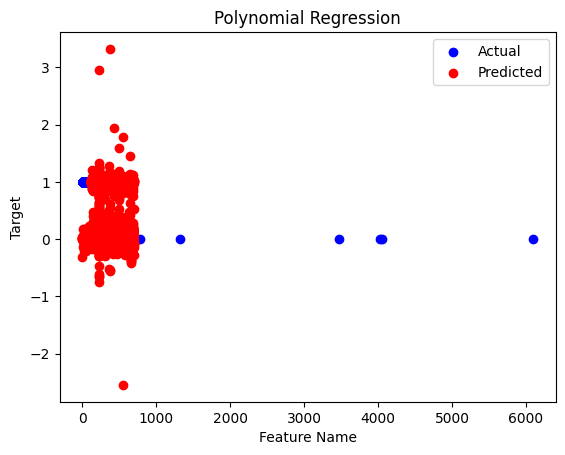

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the PhiUSIIL Phishing URL Dataset
url = 'https://media.githubusercontent.com/media/shahriariit/opendataset/master/PhiUSIIL_phishing.csv'
data = pd.read_csv(url)

# Select relevant features and target
X = data.drop(['label'], axis=1)
y = data['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Visualize the results (optional)
plt.scatter(X_test['URLLength'], y_test, color='blue', label='Actual')
plt.scatter(X_test['TLD'], y_pred, color='red', label='Predicted')
plt.xlabel('Feature Name')
plt.ylabel('Target')
plt.title('Polynomial Regression')
plt.legend()
plt.show()
